In [125]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm

sns.set(style="whitegrid")

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
500,1956,1,General Motors,12443.3,1189.5
1000,1957,1,General Motors,10796.4,847.4
1500,1958,1,General Motors,10989.8,843.6
2000,1959,1,General Motors,9522.0,633.6
2500,1960,1,General Motors,11233.1,873.1
3000,1961,1,General Motors,12736.0,959
3500,1962,1,General Motors,11395.9,892.8
4000,1963,1,General Motors,14640.2,1459.1
4500,1964,1,General Motors,16494.8,1591.8


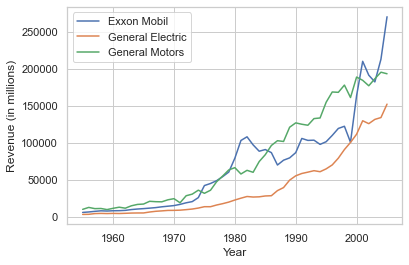

In [137]:
# Porównanie przychodów

df = pd.read_csv('fortune500-full.csv')
df1 = df[df['Company']==('General Motors')]
df2 = df[df['Company']==('Exxon Mobil')]
df3 = df[df['Company']==('General Electric')]

frames = [df1, df2, df3]

result = pd.concat(frames)

result.set_index("Year", inplace=True)
result.groupby("Company")["Revenue (in millions)"].plot(legend=True, xlabel="Year", ylabel="Revenue (in millions)")

In [127]:
df1.insert(4, "Growth Rate", 1)
df2.insert(4, "Growth Rate", 1)
df3.insert(4, "Growth Rate", 1)

c:\users\micha\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Company
Exxon Mobil         AxesSubplot(0.125,0.125;0.775x0.755)
General Electric    AxesSubplot(0.125,0.125;0.775x0.755)
General Motors      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Growth Rate, dtype: object

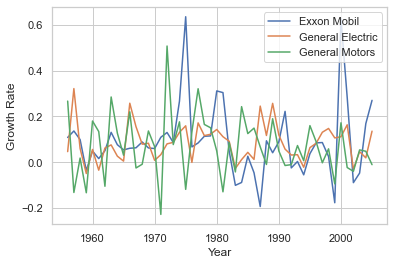

In [128]:
# Porównanie stóp wzrostu


df1[['Growth Rate']] = df1[['Revenue (in millions)']].pct_change(periods = 1)

df2[['Growth Rate']] = df2[['Revenue (in millions)']].pct_change(periods = 1)

df3[['Growth Rate']] = df3[['Revenue (in millions)']].pct_change(periods = 1)

result = pd.concat(frames)
result.set_index("Year", inplace=True)
result.groupby("Company")["Growth Rate"].plot(legend=True, xlabel="Year", ylabel="Growth Rate")

Company
Exxon Mobil         AxesSubplot(0.125,0.125;0.775x0.755)
General Electric    AxesSubplot(0.125,0.125;0.775x0.755)
General Motors      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Revenue (in millions), dtype: object

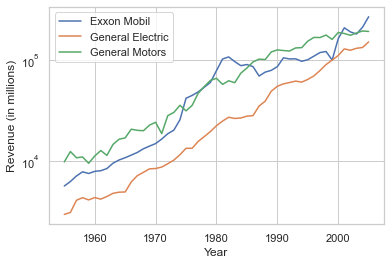

In [129]:
# Porównanie skali logarytmicznej

result.groupby("Company")["Revenue (in millions)"].plot(kind="line", legend=True, xlabel="Year", ylabel="Revenue (in millions)", logy=True)

In [130]:
# Porównanie średnich

df1Mean = str(round(df1["Revenue (in millions)"].mean()))
df2Mean = str(round(df2["Revenue (in millions)"].mean()))
df3Mean = str(round(df3["Revenue (in millions)"].mean()))


print("Means for General Motors, Exxon Mobil and General Electric respectively: " + df1Mean + ", " + df2Mean + ", " + df3Mean)

Means for General Motors, Exxon Mobil and General Electric respectively: 78805, 71561, 39211


In [131]:
# Porównanie median


df1Median = str(round(df1["Revenue (in millions)"].median()))
df2Median = str(round(df2["Revenue (in millions)"].median()))
df3Median = str(round(df3["Revenue (in millions)"].median()))


print("Medians for General Motors, Exxon Mobil and General Electric respectively: " + df1Median + ", " + df2Median + ", " + df3Median)

Medians for General Motors, Exxon Mobil and General Electric respectively: 60026, 69888, 22461


In [132]:
# Porównanie odchyleń standardowych

df1Std = str(round(df1["Revenue (in millions)"].std()))
df2Std = str(round(df2["Revenue (in millions)"].std()))
df3Std = str(round(df3["Revenue (in millions)"].std()))


print("Standard deviations for General Motors, Exxon Mobil and General Electric respectively: " + df1Std + ", " + df2Std + ", " + df3Std)

Standard deviations for General Motors, Exxon Mobil and General Electric respectively: 64512, 64016, 42187


In [133]:
# Porównanie współczynników zmienności

df1Cv = str(float(df1Std)/float(df1Mean))
df2Cv = str(float(df2Std)/float(df2Mean))
df3Cv = str(float(df3Std)/float(df3Mean))

print("Coefficient of variations for General Motors, Exxon Mobil and General Electric respectively: " + df1Cv + ", " + df2Cv + ", " + df3Cv)
df1

Coefficient of variations for General Motors, Exxon Mobil and General Electric respectively: 0.8186282596281962, 0.8945654756082223, 1.0758970696998291


,Year,Rank,Company,Revenue (in millions),Growth Rate,Profit (in millions)
0,1955,1,General Motors,9823.5,NaN,806
500,1956,1,General Motors,12443.3,0.266687,1189.5
1000,1957,1,General Motors,10796.4,-0.132352,847.4
1500,1958,1,General Motors,10989.8,0.017913,843.6
2000,1959,1,General Motors,9522.0,-0.133560,633.6
2500,1960,1,General Motors,11233.1,0.179700,873.1
3000,1961,1,General Motors,12736.0,0.133792,959
3500,1962,1,General Motors,11395.9,-0.105221,892.8
4000,1963,1,General Motors,14640.2,0.284690,1459.1
4500,1964,1,General Motors,16494.8,0.126679,1591.8


c:\users\micha\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


Company
Exxon Mobil         AxesSubplot(0.125,0.125;0.775x0.755)
General Electric    AxesSubplot(0.125,0.125;0.775x0.755)
General Motors      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Revenue (in millions), dtype: object

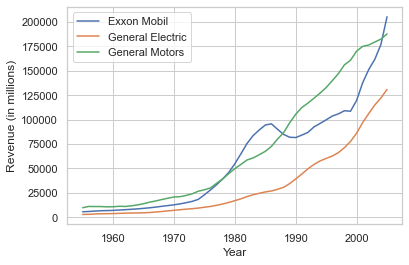

In [134]:
# Porównanie średnich kroczących

df1Rolling_windows = df1.rolling(6, min_periods=1)
df1Rolling_mean = df1Rolling_windows.mean()

df2Rolling_windows = df2.rolling(6, min_periods=1)
df2Rolling_mean = df2Rolling_windows.mean()

df3Rolling_windows = df3.rolling(6, min_periods=1)
df3Rolling_mean = df3Rolling_windows.mean()

df1Display_rolling = df1
df2Display_rolling = df2
df3Display_rolling = df3

df1Display_rolling.loc[:, ['Revenue (in millions)']] = df1Rolling_mean[['Revenue (in millions)']]
df2Display_rolling.loc[:, ['Revenue (in millions)']] = df2Rolling_mean[['Revenue (in millions)']]
df3Display_rolling.loc[:, ['Revenue (in millions)']] = df3Rolling_mean[['Revenue (in millions)']]

frames = [df1Display_rolling, df2Display_rolling, df3Display_rolling]

result = pd.concat(frames)

result.set_index("Year", inplace=True)
result.groupby("Company")["Revenue (in millions)"].plot(legend=True, xlabel="Year", ylabel="Revenue (in millions)")